In [294]:
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib


import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import xlrd


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection #might be model_selection <--- this is the new one
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
import seaborn as sns
import xgboost as xgb
sns.set_style("whitegrid")
%matplotlib inline

scipy: 1.0.0
numpy: 1.12.1
matplotlib: 2.1.0
pandas: 0.21.1
sklearn: 0.19.1


In [ ]:
data = pd.read_csv('SuperZooData/Registration_Data/SuperZoo_2016_Registrants_No_Minors.csv', header = 2)


In [ ]:
data = data.apply(pd.to_numeric, errors='ignore') 

In [ ]:
data.shape

In [ ]:
data = data.loc[:,~data.columns.duplicated()]   #drops columns with duplicate names and values

In [ ]:
data.shape

In [ ]:
data.shape

In [ ]:
data = data.apply(pd.to_numeric, errors='ignore')

In [ ]:
data = data.loc[: , ~data.columns.duplicated()]

In [ ]:
data.shape

In [ ]:
data = data.dropna(axis=1, how='all')

In [ ]:
data.shape

In [ ]:
data = data.dropna(axis=0, how='all')

In [ ]:
data.shape

In [ ]:
#(data.T.drop_duplicates(subset=data.index)).T  # to big of a dataset to use this to get rid of duplicate columns with different names

In [ ]:
dupes = {}                        # checks to see if duplicated columns with different index values
for col_a in data.columns:
    dupes[col_a] = []

    for col_b in data.columns:
        if col_b in dupes.keys():
            continue
        if (data.loc[:,col_a] == data.loc[:,col_b]).sum() == len(data.loc[:,col_a]):
            dupes[col_a].append(col_b)    
   
bad_cols = []   
for col, dup_cols in dupes.iteritems():
    bad_cols += dup_cols
bad_cols = set(bad_cols)

data = data.loc[:,~data.columns.isin(bad_cols)]

In [ ]:
data.shape

In [ ]:
col = []
for a in data:
    if "_text" in a or "_other" in a:
        col.append(a)

In [ ]:
data=data.drop(labels = col, axis =1)

In [ ]:
data.shape

In [ ]:
for a in data.columns:
    print a

In [ ]:
col =["Pwd", "UserName", "AccountKeyPublic","AccountKeyPrivate", "Notes"]

In [ ]:
data=data.drop(labels = col, axis =1)

In [ ]:
data.shape

In [ ]:
data.to_pickle("Data_Zoo.pkl")

In [132]:
data = pd.read_pickle("Data_Zoo.pkl")

In [136]:
col = []
for a in range(0, len(data.columns)):
    if a > 98:
        col.append(data.columns[a])
    print a, data.columns[a]

0 Id
1 AccountId
2 ExhibitorId
3 FirstName
4 LastName
5 JobTitle
6 Company
7 Address1
8 Address2
9 City
10 State
11 ZipPostal
12 Country
13 CountryName
14 Phone1CountryPrefix
15 Phone1Number
16 Phone1Ext
17 Phone2CountryPrefix
18 Phone2Number
19 Phone2Ext
20 FaxCountryPrefix
21 Email
22 WebUrl
23 MemberStatus
24 TermsAccepted
25 LangId
26 ClientIp
27 Status
28 Approval
29 ApprovalUserId
30 SourceApp
31 FirstPrintDate Date
32 FirstPrintDate Time
33 FirstPrintLocId
34 FirstPrintStationId
35 CheckInDate Date
36 CheckInDate Time
37 Aux1
38 Aux2
39 Aux4
40 Aux5
41 Aux6
42 AddDate Date
43 AddDate Time
44 AddUserId
45 ModifyDate Date
46 ModifyDate Time
47 ModifyUserId
48 RegType
49 RegTypeDesc
50 PurchaseItems
51 AmountBilled
52 AmountPaid
53 AmountDue
54 IndexDate
55 StreamId
56 StreamName
57 StreamStatus
58 StreamStep
59 Response_2_codes
60 Response_4_codes
61 Response_5_codes
62 Response_6_codes
63 Response_7_codes
64 Response_11_codes
65 Response_12_codes
66 Response_13_codes
67 Response_

In [138]:
data = data.drop(col, axis = 1)

In [139]:
data

,Id,AccountId,ExhibitorId,FirstName,LastName,JobTitle,Company,Address1,Address2,City,State,ZipPostal,Country,CountryName,Phone1CountryPrefix,Phone1Number,Phone1Ext,Phone2CountryPrefix,Phone2Number,Phone2Ext,FaxCountryPrefix,Email,WebUrl,MemberStatus,TermsAccepted,LangId,ClientIp,Status,Approval,ApprovalUserId,SourceApp,FirstPrintDate Date,FirstPrintDate Time,FirstPrintLocId,FirstPrintStationId,CheckInDate Date,CheckInDate Time,Aux1,Aux2,Aux4,Aux5,Aux6,AddDate Date,AddDate Time,AddUserId,ModifyDate Date,ModifyDate Time,ModifyUserId,RegType,RegTypeDesc,PurchaseItems,AmountBilled,AmountPaid,AmountDue,IndexDate,StreamId,StreamName,StreamStatus,StreamStep,Response_2_codes,Response_4_codes,Response_5_codes,Response_6_codes,Response_7_codes,Response_11_codes,Response_12_codes,Response_13_codes,Response_14_codes,Response_15_codes,Response_16_codes,Response_18_codes,Response_19_codes,Response_20_codes,Response_21_codes,Response_22_codes,Response_23_codes,Response_24_codes,Response_25_codes,Response_26_codes,Response_28_codes,Response_29_codes,Response_30_codes,Response_31_codes,Response_32_codes,Response_33_codes,Response_34_codes,Response_35_codes,Response_36_codes,Response_38_codes,Response_39_codes,Response_40_codes,Response_41_codes,Response_43_codes,Response_44_codes,Response_45_codes,Response_47_codes,Response_48_codes,Response_49_codes,Response_50_codes
1,16217,115248,0,Irwin,"""The General"" Raymer",Talent - Celebrity VIP,Shadow Sports & Ent,634 wounded star ave,NaN,las vegas,NV,89178,USA,United States,1,5.71215e+09,NaN,1,5.712151e+09,NaN,NaN,espnmaguire@hotmail.com,NaN,NonMember,accepted,1,68.96.221.187,active,approved,20,online,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/06/2016,13:08:10,20,07/06/2016,13:13:43,20,ATT,Attendee,",ATT,KEY,",0.0,0.0,0.0,8/1/2016 11:15:37 PM,16216,AttendeeChild,final,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14104,113135,0,Dr Kotha,.,CEO,FRG Manufacturing,5414 W. Crenshaw St,NaN,Tampa,FL,33634,USA,United States,1,8.13882e+09,NaN,1,NaN,NaN,1.0,kotha@frgvet.com,NaN,NonMember,accepted,1,108.190.212.87,active,approved,20,online,08/02/2016,09:30:55,47,54,08/02/2016,09:30:55,NaN,NaN,NaN,NaN,NaN,06/24/2016,08:37:16,20,08/02/2016,09:30:55,20,ATL,Attendee Group Leader,",ATL,",0.0,0.0,0.0,10/27/2016 9:37:25 PM,14103,attendee,final,99,",0208,0211,0215,0220,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",4329,",",4401,",",4501,4502,",NaN,NaN,NaN,NaN
3,17505,116536,0,Assistance,1,Assistance,ATSU Trading,"201 Daigo-Azuma Building, 3-38","Kanda sakumacho, Chiyoda",Tokyo,NaN,1010025,JPN,Japan,81,8.04444e+09,NaN,81,NaN,NaN,NaN,trade@atsut.com,NaN,NonMember,accepted,1,110.3.34.20,active,approved,20,online,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/11/2016,18:31:32,20,07/11/2016,18:32:23,20,ATT,Attendee,",ATT,",0.0,0.0,0.0,8/1/2016 11:15:59 PM,17504,AttendeeChild,final,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8298,107329,0,JR,Abad,Buyer,Flour Head Bakery,5424 South Middlebrow Pike,NaN,Knoxville,TN,37921,USA,United States,1,9.17774e+09,NaN,1,NaN,NaN,NaN,juanabad@mac.com,NaN,NonMember,accepted,1,107.211.104.6,active,approved,20,online,08/02/2016,13:20:53,46,53,08/02/2016,13:20:53,NaN,NaN,NaN,NaN,NaN,05/09/2016,12:26:41,20,08/02/2016,13:20:53,20,ATT,Attendee,",ATT,KEY,",0.0,0.0,0.0,8/2/2016 8:20:53 PM,8297,AttendeeChild,final,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1789,101764,0,Barbara,Abate,Staff,FANTASIA APSOS,4900 Pulsar Ct.,NaN,Las Vegas,NV,89130,USA,United States,1,7.02656e+09,NaN,1,NaN,NaN,NaN,bellaluna6@outlook.com,NaN,NonMember,accepted,1,205.153.115.189,active,ap

In [140]:
#for a in range(1,len(data['Email'])):
#    data['Email'][a]= data['Email'][a].split("@",1)[1] 
    
for row in data.itertuples():
    data.loc[row.Index, 'Email'] = data['Email'][row.Index].split("@",1)[1]
   
    

In [ ]:
#for a in range(0,len(data.columns)):                                          # look at values of columns
#    if len(data.iloc[:,1])-data.iloc[:,a].isnull().sum() == 0:
#         print data.columns[a], len(data.iloc[:,1])-data.iloc[:,a].isnull().sum()

In [73]:

column_tracker ={}
for a in data:
    if "_codes" in a:
        print a
        row_list = []
        for row in data[a]:
            if not pd.isnull(row):
                for b in filter(bool, row.split(',')):
                    if b not in row_list:
                        row_list.append(b)
                       
        column_tracker.update({a: row_list})

Response_2_codes
Response_4_codes
Response_5_codes
Response_6_codes
Response_7_codes
Response_11_codes
Response_12_codes
Response_13_codes
Response_14_codes
Response_15_codes
Response_16_codes
Response_18_codes
Response_19_codes
Response_20_codes
Response_21_codes
Response_22_codes
Response_23_codes
Response_24_codes
Response_25_codes
Response_26_codes
Response_28_codes
Response_29_codes
Response_30_codes
Response_31_codes
Response_32_codes
Response_33_codes
Response_34_codes
Response_35_codes
Response_36_codes
Response_38_codes
Response_39_codes
Response_40_codes
Response_41_codes
Response_43_codes
Response_44_codes
Response_45_codes
Response_47_codes
Response_48_codes
Response_49_codes
Response_50_codes


In [74]:
column_tracker

{'Response_11_codes': ['1101', '1103'],
 'Response_12_codes': ['1201', '1202'],
 'Response_13_codes': ['1301'],
 'Response_14_codes': ['1401'],
 'Response_15_codes': ['1501'],
 'Response_16_codes': ['1601'],
 'Response_18_codes': ['1801'],
 'Response_19_codes': ['1902', '1901'],
 'Response_20_codes': ['2001'],
 'Response_21_codes': ['2101'],
 'Response_22_codes': ['2201', '2203', '2202'],
 'Response_23_codes': ['2304', '2309', '2310', '2301', '2305', '2302', '2307'],
 'Response_24_codes': ['2403', '2402', '2401'],
 'Response_25_codes': ['2501'],
 'Response_26_codes': ['2601'],
 'Response_28_codes': ['2801'],
 'Response_29_codes': ['2901'],
 'Response_2_codes': ['0208',
  '0211',
  '0215',
  '0220',
  '0207',
  '0209',
  '0205',
  '0216',
  '0206',
  '0201',
  '0203',
  '0219',
  '0212',
  '0217',
  '0226',
  '0227',
  '0213',
  '0221',
  '0222',
  '0223',
  '0224',
  '0225',
  '0204',
  '0210',
  '0214',
  '0202',
  '0218'],
 'Response_30_codes': ['3001'],
 'Response_31_codes': ['3103'

In [141]:
column =[]
for a in data.columns:
    if "_codes" in a:
        column.append(a)


In [142]:
for a in column:
    new_data = data[a].str.get_dummies(sep=',')
    data = pd.concat([data, new_data], axis=1)
    data = data.drop([a], axis = 1)

In [153]:
data['LastName'].dtype

dtype('O')

In [156]:
for a in data.columns:
    if data[a].dtype== np.dtype('O'):
        data[a] = data[a].astype('S32')

In [167]:
cols = list(data)    # THIS DROPS ALL COLUMNS THAT HAVE THE SAME VALUE
nunique = data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
data = data.drop(cols_to_drop, axis=1)

In [170]:
data= data.drop(['WebUrl'], axis = 1)

In [193]:
data = data.drop(["CheckInDate Date"], axis = 1)

In [207]:
data = data.drop(["Aux1", "Aux5"], axis = 1)

In [210]:
data = data.drop(["FirstPrintDate Time","FirstPrintLocId", 'FirstPrintStationId','CheckInDate Time' ], axis = 1)

In [214]:
data = data.drop(["ModifyDate Time", "IndexDate"], axis = 1)

In [216]:
data.to_pickle("Data_Zoo.pkl")

In [378]:
data = pd.read_pickle("Data_Zoo.pkl")

In [380]:
new_data = data['PurchaseItems'].str.get_dummies(sep=',')
data = pd.concat([data, new_data], axis=1)
data = data.drop(['PurchaseItems'], axis = 1)

KeyError: 'PurchaseItems'

In [ ]:
data.to_pickle("Data_Zoo.pkl")

In [419]:
data = pd.read_pickle("Data_Zoo.pkl")

In [420]:
data = data.drop(['RegTypeDesc'], axis = 1)

In [421]:
data = data.drop(['SourceApp'], axis = 1)

In [422]:
data = data.drop(['CountryName'], axis = 1)

In [423]:
data = data.drop(['StreamName', 'RegType'], axis = 1)

In [424]:
data = pd.get_dummies(data,columns = ['StreamStatus', 'StreamStep', 'Aux6', 'ApprovalUserId', 'LangId', 'MemberStatus', 'Country', 'TermsAccepted'], dummy_na = True)

In [425]:
data = data.drop(["AddUserId","ModifyUserId"],axis = 1)

In [426]:
data = data.drop(["AddDate Date","AddDate Time","ModifyDate Date"],axis = 1)

In [427]:
y =[]
for a in data['FirstPrintDate Date']:
    
    if a == 'nan':
        y.append(0)
    else:
        y.append(1)
    

In [428]:
X = data.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:]

In [429]:
for a in X.columns:
    for b in range(0,len(X.columns)):
        if a == X.columns[b]:
            print b, X.columns[b] 

0 AccountId
1 Phone1CountryPrefix
2 Phone2CountryPrefix
3 Phone2Number
4 FaxCountryPrefix
5 AmountBilled
6 AmountPaid
7 AmountDue
8 StreamId
9 0201
10 0202
11 0203
12 0204
13 0205
14 0206
15 0207
16 0208
17 0209
18 0210
19 0211
20 0212
21 0213
22 0214
23 0215
24 0216
25 0217
26 0218
27 0219
28 0220
29 0221
30 0222
31 0223
32 0224
33 0225
34 0226
35 0227
36 0401
37 0402
38 0501
39 0502
40 0601
41 0602
42 0701
43 0702
44 1101
45 1103
46 1201
47 1202
48 1301
49 1401
50 1501
51 1601
52 1801
53 1901
54 1902
55 2001
166 2001
56 2101
57 2201
58 2202
59 2203
60 2301
61 2302
62 2304
63 2305
64 2307
65 2309
66 2310
67 2401
68 2402
69 2403
70 2501
71 2601
72 2801
73 2901
74 3001
208 3001
75 3101
76 3102
77 3103
78 3104
79 3201
80 3301
81 3401
82 3501
83 3601
84 3801
85 3802
86 3901
87 3902
88 4001
89 4002
90 4101
91 4301
92 4302
93 4303
94 4304
95 4305
96 4306
97 4310
98 4311
99 4312
100 4313
101 4314
102 4315
103 4316
104 4317
105 4318
106 4319
107 4321
108 4322
109 4323
110 4324
111 4325
112 43

In [430]:
d = {'3001': ['3001', '3001.1']}


In [431]:
X = X.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)
  # renames duplicate column names

In [432]:
d = {'2001': ['2001', '2001.1']}

In [433]:
X = X.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)
  # renames duplicate column names

In [434]:
d = {'TermsAccepted_nan': ['TermsAccepted_nan', 'TermsAccepted_nan.1']}

In [435]:
X = X.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)
  # renames duplicate column names

In [436]:
d = {'MemberStatus_nan': ['MemberStatus_nan', 'MemberStatus_nan.1']}

In [437]:
X = X.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)
  # renames duplicate column names

In [438]:
from sklearn.preprocessing import Imputer

In [439]:
data_X_hold = X.columns
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
imp.fit(X)
data_T=imp.transform(X)
X = pd.DataFrame(data_T, columns = data_X_hold)

In [440]:
num_folds = 10
num_instances = len(X) 
seed = 7
scoring = 'roc_auc'

In [441]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.537467 (0.012918)
NB: 0.496771 (0.019021)
CART: 0.683163 (0.012078)
KNeighborsClassifier: 0.630727 (0.010253)
XGBClassifier: 0.747992 (0.017184)
GradientBoostingClassifier: 0.750363 (0.017261)
AdaBoostClassifier: 0.741829 (0.016263)
RandomForestClassifier: 0.759031 (0.012167)
ExtraTreesClassifier: 0.747755 (0.013423)
DecisionTreeClassifier: 0.683163 (0.012078)


In [442]:
estimator = RandomForestClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num of feature: 78
Feature Ranking: [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  37 174 184 136 156 165 114 206 173  98  48 204  11  86  18  71  65 116
  76  62 201 131 191  90 231 192  92 256 193 238 263 117 254  74 154 196
 229 216 171 239 208 181 128  94 247 226 205  91  97 115  46 214 215 235
 186   1   1   1   8  15   1  64   1   1   1   1   7   1  50   1  19  31
   1  21   1   5   1  49   1   1  27   1   1   1 127   1   1   4   1   1
   1   6  24   1   1   1   1 155  39 152 158  29  93   1  69  32 222 101
 106  83  68  43 100  34  61 143  88 113  85  54  23  38  84  53  79  66
 107 164 121  16 250 123 146 194 264 151 160 147 172 240  51 163 175 132
 112 190 182 176 111 237 133 142 188  70 225 219 138 209 258 217 125 109
 105 243 139 153 150 218 149 179 203 145 130 245 228 221 252 157 110 257
 211 200 207 234 210 251 224 233 108 236 137 241 259 120   9  87  73  77
 104  26 183  1

In [443]:
top_78_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_78_important_features.append(b)
        print b,X.columns[b]

0 AccountId
1 Phone1CountryPrefix
2 Phone2CountryPrefix
3 Phone2Number
4 FaxCountryPrefix
5 AmountBilled
6 AmountPaid
7 AmountDue
8 StreamId
9 0201
10 0202
11 0203
12 0204
13 0205
14 0206
15 0207
16 0208
17 0209
18 0210
19 0211
20 0212
21 0213
22 0214
23 0215
24 0216
25 0217
26 0218
27 0219
28 0220
29 0221
30 0222
31 0223
32 0224
33 0225
34 0226
35 0227
91 4301
92 4302
93 4303
96 4306
98 4311
99 4312
100 4313
101 4314
103 4316
105 4318
108 4322
110 4324
112 4326
114 4329
115 4330
117 4332
118 4333
119 4336
121 4338
122 4339
124 4341
125 4346
126 4347
129 4352
130 4401
131 4501
132 4502
139 1002
244 ATL
245 ATT
247 KEY
248 StreamStatus_final
249 StreamStatus_pending
262 Aux6_0.0
263 Aux6_1.0
264 Aux6_nan
267 ApprovalUserId_21.0
269 LangId_0.0
284 Country_CAN
332 Country_USA
339 TermsAccepted_accepted
340 TermsAccepted_nan


In [444]:
new_X = X.iloc[:,top_78_important_features]

In [445]:
X = new_X

In [446]:
top_78 = X

In [447]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.537467 (0.012918)
NB: 0.496771 (0.019021)
CART: 0.682157 (0.013525)
KNeighborsClassifier: 0.630811 (0.010104)
XGBClassifier: 0.748427 (0.016851)
GradientBoostingClassifier: 0.752311 (0.017488)
AdaBoostClassifier: 0.742447 (0.017097)
RandomForestClassifier: 0.755964 (0.011159)
ExtraTreesClassifier: 0.749346 (0.011645)
DecisionTreeClassifier: 0.682157 (0.013525)


In [448]:
y_test = pd.DataFrame({'y': y})

In [449]:
Z=[]
Z=pd.concat([X,y_test],axis=1)

In [450]:
corr = Z.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

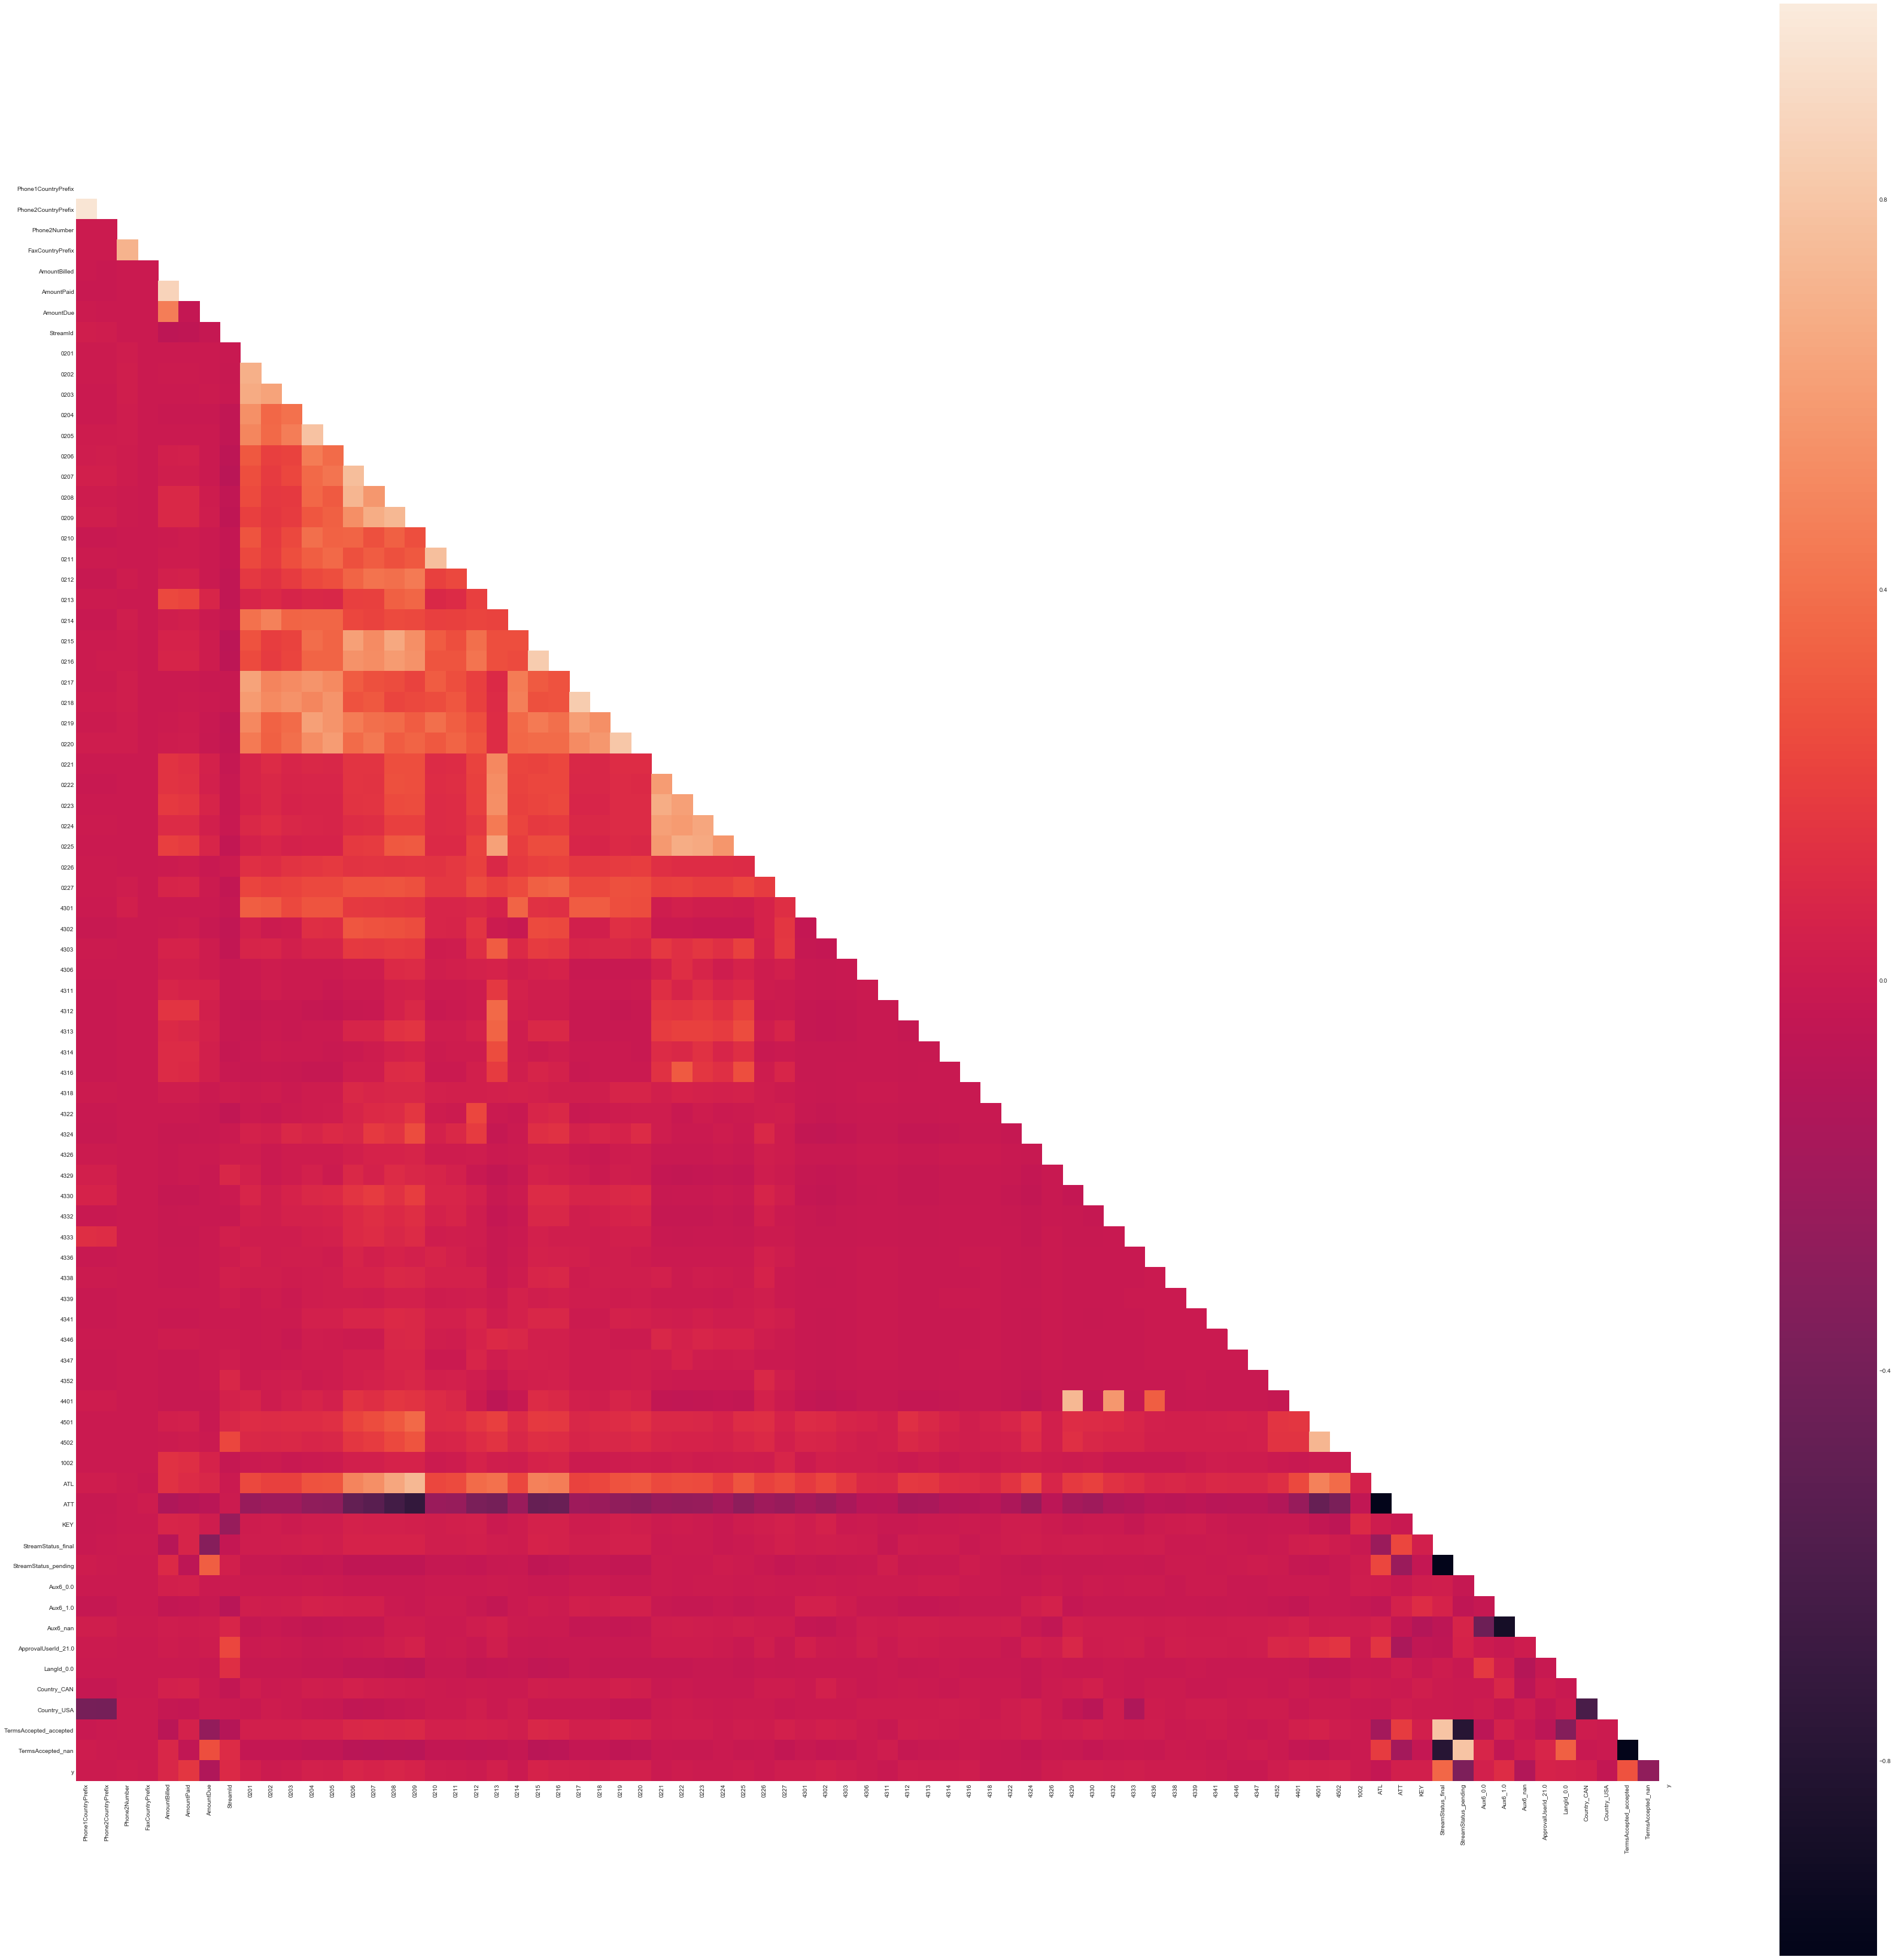

In [451]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [452]:
estimator = RandomForestClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num of feature: 4
Feature Ranking: [ 1  8 20  1  2  6  3 43  1 46 32 52 34 19 23 16 15 12 37 30 13 14 31 18 10
 57 41 44 22 40 36 33 58 24 21 25 47 28 48 60 71 50 53 62 70 68 45 17 69 54
 27 55 56 73 74 75 64 61 63 59 35 11 26 51 65 42  9  5  1 66 39  7 72 67 49
 29  4 38]


In [453]:
top_4_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_4_important_features.append(b)
        print b,X.columns[b]

0 AccountId
3 Phone2Number
8 StreamId
68 StreamStatus_pending


In [454]:
new_X4 = X.iloc[:,top_4_important_features]

In [455]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, new_X4, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.537547 (0.012974)
NB: 0.520314 (0.014516)
CART: 0.690904 (0.012714)
KNeighborsClassifier: 0.645869 (0.016023)
XGBClassifier: 0.685832 (0.014821)
GradientBoostingClassifier: 0.693014 (0.014806)
AdaBoostClassifier: 0.673989 (0.016021)
RandomForestClassifier: 0.752881 (0.014376)
ExtraTreesClassifier: 0.754018 (0.010078)
DecisionTreeClassifier: 0.690904 (0.012714)


In [456]:
estimator = ExtraTreesClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(new_X4,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num of feature: 4
Feature Ranking: [1 1 1 1]


In [457]:
new_X4 

,AccountId,Phone2Number,StreamId,StreamStatus_pending
0,115248.0,5.712151e+09,16216.0,0.0
1,113135.0,3.731906e+02,14103.0,0.0
2,116536.0,3.947382e+02,17504.0,0.0
3,107329.0,3.401118e+02,8297.0,0.0
4,101764.0,3.045971e+02,1788.0,0.0
5,123327.0,4.342147e+02,24295.0,0.0
6,104736.0,3.211496e+02,4760.0,0.0
7,123429.0,4.348147e+02,24397.0,0.0
8,122132.0,4.271853e+02,23100.0,0.0
9,109245.0,3.503519e+02,10213.0,0.0


In [206]:
data.Aux6.value_counts()

1.0    807
0.0    209
Name: Aux6, dtype: int64

In [281]:
num_folds = 10
num_instances = len(X) 
seed = 7
scoring = None

NameError: name 'X' is not defined

In [112]:

pd.set_option('display.max_columns', 500)

In [ ]:
for b in range(0, len(data.columns)):
    print b, data.columns[b]